In [ ]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#from tqdm.notebook import tqdm
from tqdm import tqdm

from scipy.stats import norm 
import pyprobml_utils as pml


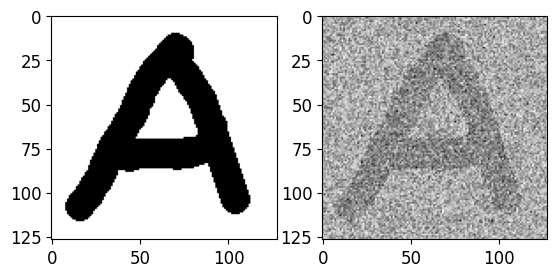

In [6]:

np.random.seed(1)

sigma =2

img = pd.read_csv('https://raw.githubusercontent.com/probml/probml-data/main/data/letterA.csv').to_numpy()
mean = np.mean(img)
base = np.ones(img.shape)
img2 = base*(img > mean) - base*(img<mean)
y = img2 + sigma*np.random.normal(size = img2.shape)

fig, axs = plt.subplots(1,2)
axs[0].imshow(img2, cmap="Greys")
axs[1].imshow(y, cmap="Greys")
plt.show()


In [7]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
 
def energy(ix, iy, X, J):
  wi = 0
  if iy > 0:
    wi += X[iy-1, ix]
  if iy < X.shape[0]-1:
    wi += X[iy+1, ix]
  if ix > 0:
    wi += X[iy, ix-1]
  if ix<X.shape[1]-1:
    wi += X[iy, ix+1]
  return 2*J*wi 

def posterior_mean(f):
  return X[Nburin:]

def gibbs(rng, img, J, niter=10, nburin=0):
  if not niter:
    return img 

  assert niter>nburin, "niter cannot be the same or smaller then the nburin"

  img2 = img.copy()

  normNeg = norm(loc=-1, scale=np.sqrt(sigma))
  normPos = norm(loc=1, scale=np.sqrt(sigma))
  logOdds = normNeg.logpdf(img)- normPos.logpdf(img)

  X = np.zeros(img.shape)

  for iter in tqdm(range(niter)):
    for ix in range(img.shape[1]):
      for iy in range(img.shape[0]):
        e = energy(ix, iy, img2, J)
      
        if rng.random(1) < sigmoid(e - logOdds[iy, ix]):
          img2[ iy, ix] = 1
        else:
          img2[ iy, ix] = -1
    X += img2 
  return (1/(niter-nburin))*X

def meanfield(img, J, niter=10, rate=1):
  img2 = img.copy()

  normNeg = norm(loc=-1, scale=np.sqrt(sigma))
  normPos = norm(loc=1, scale=np.sqrt(sigma))
  logOdds = normNeg.logpdf(img)- normPos.logpdf(img)

  p1 = sigmoid(logOdds)
  mu = 1-2*p1 

  if not niter:
    return img 

  for iter in tqdm(range(niter)): 
    for ix in range(img.shape[1]):
      for iy in range(img.shape[0]):
        Sbar = energy(ix, iy, mu, J)
        mu[ iy, ix] = (1-rate)*mu[iy, ix]  + rate*np.tanh(Sbar + 0.5*logOdds[iy, ix])
  return mu


100%|██████████| 15/15 [00:00<00:00, 23.38it/s]


saving image to d:\WP\Zpace\Workspace\Teaching\IE4497\Repository\Lectures\Weeks 1-6\pml-code\notebooks\..\figures\meanFieldDenoising.pdf


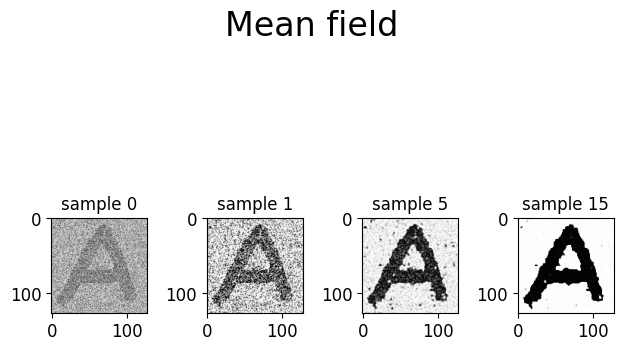

100%|██████████| 15/15 [00:00<00:00, 15.36it/s]


saving image to d:\WP\Zpace\Workspace\Teaching\IE4497\Repository\Lectures\Weeks 1-6\pml-code\notebooks\..\figures\gibbsDenoising.pdf


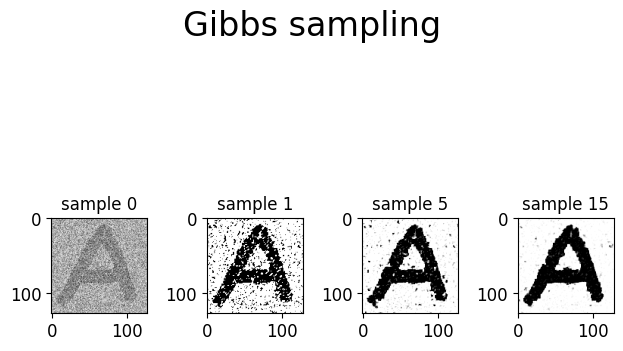

In [8]:
#Mean field figure
seed = 10
rng = np.random.default_rng(seed)
iters = [0, 1, 5, 15]
fig, axs = plt.subplots(1,4)
for i, x in enumerate(iters):
  axs[i].imshow(meanfield(y, 1, niter=x, rate=0.2), cmap="Greys")
  axs[i].set_title(f"sample {x}")
plt.suptitle('Mean field')
plt.tight_layout()
pml.savefig('meanFieldDenoising.pdf')
plt.show()

# Gibbs Sampling figure
fig, axs = plt.subplots(1,4)
for i, x in enumerate(iters):
  axs[i].set_title(f"sample {x}")
  axs[i].imshow(gibbs(rng, y, 1, niter=x), cmap="Greys")
plt.suptitle('Gibbs sampling')
plt.tight_layout()
pml.savefig('gibbsDenoising.pdf')
plt.show()

